
<center>
<img src="logoCHIVO-h260.png" />
<h1> Advanced Computing for Astronomy Library (ACALib) </h1>
<b>Mauricio Araya, Martín Villanueva, Camilo Valenzuela, Axel Simonsen, Marcelo Jara, Teodoro Hochfarber, Manuel Sanchez, Gonzalo Moya.</b>


<img src="contrib.png"/>
</center>




# What is ACALib


### ACAlib is:
* a ChiVO library, 
* written in Python,
* focused on simple use of advanced computing.

### With advanced computing we refer to:
* advanced high-level astronomical algorithms,
* VO-compatible in terms of data access and application layers,
* parallel support for high-performance computing (e.g., MPI).





### Astronomy uses several file formats
* FITS (de facto)
* HDS (other standard)
* MS, ASDM, etc (custom) 
* ASDF (new)
* VoTable (VO-format)

### All of these can basically are *containers* of:
1. Tables + Metadata
2. N-dimensional Images + Metadata
3. Optional: Hierarchical relations

# Data in ACALib

## Library and path initializations

In [1]:
%matplotlib inline
import sys
sys.path.append('../')

from acalib import *
from acalib.io.graph import *

binpath = '../bindata/fits/cubes/'
# Data from ALMA science verification 
orion_path = binpath + 'Orion.methanol.cbc.contsub.image.fits'
m100_path = binpath + 'M100line.image.fits'

## FITS are loaded to containers

Using *load_fits(path)*

### A container has
* A *primary* object (image)
* A *nddata* list of astropy NDData 
* A *table* list of astropy tables

Let us load the Orion methanol line


In [2]:
container = load_fits(orion_path)
orion = container.primary

INFO: Processing HDU 0 (Image) [acalib.io.fits]
INFO: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.fits]


In [3]:
#Data...

# Visualization
## We can visualize them directly in 3D

In [4]:
#visualize(orion)

### Or visualize their 3D contours

In [5]:
#visualize(orion,contour=True)

## We can obtain for instance the zeroth moment

INFO: NDData was created with a masked array, and a mask was explicitly provided to NDData. The  explicitly passed-in mask will be used and the masked array's mask will be ignored. [astropy.nddata.nddata]


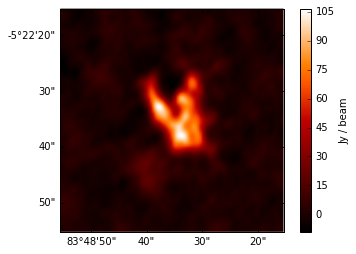

In [6]:
m0 = moment0(orion)
visualize(m0)

### And the same for moments 1 and 2

INFO: NDData was created with a masked array, and a mask was explicitly provided to NDData. The  explicitly passed-in mask will be used and the masked array's mask will be ignored. [astropy.nddata.nddata]


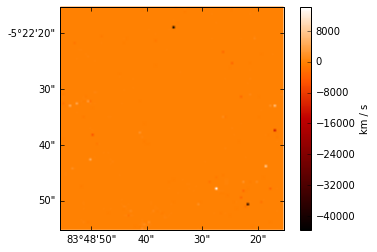

../acalib/core/utils.py:59: RuntimeWarning: invalid value encountered in sqrt
  m2=np.sqrt(beta*var/m0 - m1*m1)


INFO: NDData was created with a masked array, and a mask was explicitly provided to NDData. The  explicitly passed-in mask will be used and the masked array's mask will be ignored. [astropy.nddata.nddata]


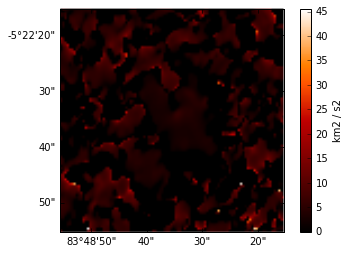

In [7]:
visualize(moment1(orion))
visualize(moment2(orion))

## After denoising

INFO: NDData was created with a masked array, and a mask was explicitly provided to NDData. The  explicitly passed-in mask will be used and the masked array's mask will be ignored. [astropy.nddata.nddata]


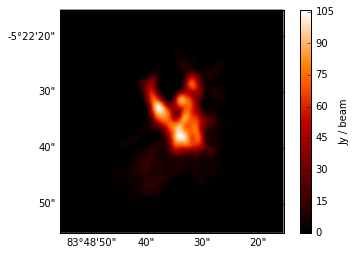

INFO: NDData was created with a masked array, and a mask was explicitly provided to NDData. The  explicitly passed-in mask will be used and the masked array's mask will be ignored. [astropy.nddata.nddata]


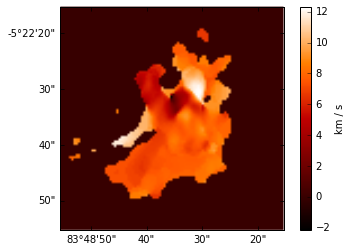

INFO: NDData was created with a masked array, and a mask was explicitly provided to NDData. The  explicitly passed-in mask will be used and the masked array's mask will be ignored. [astropy.nddata.nddata]


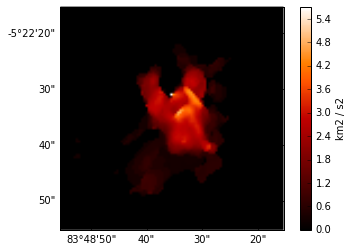

In [8]:
rms = estimate_rms(orion)
den_orion = denoise(orion,threshold=1.5*rms)
visualize(moment0(den_orion))
visualize(moment1(den_orion))
visualize(moment2(den_orion))

# Data Manipulation

ACALib support images with masks, and still they can be manipulated.
Let us change the file to M100 galaxy

In [9]:
container = load_fits(m100_path)
M100 = container.primary
#visualize(M100)

INFO: Processing HDU 0 (Image) [acalib.io.fits]
INFO: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.fits]


## Denoise and visualize 

In [10]:
ms = estimate_rms(M100)
M100 = denoise(M100,threshold=2.0*rms
#visualize(M100,contour=True)

visualize(moment0(M100))
print "Rest Freq =",M100.wcs.wcs.restfrq
visualize(moment1(M100))
visualize(moment1(M100,restfrq=1.1465e+11))


SyntaxError: invalid syntax (<ipython-input-10-c326d440ff47>, line 5)

## Get an Spectrum

In [ ]:
M100.wcs.celestial

In [ ]:
pos=[301,301]*u.pix
ape=40*u.pix

visualize(spectra(M100,position=pos,aperture=ape))


## Get a subcube

In [ ]:
M100.wcs

In [ ]:
lb=np.array([10,250,250])
ub=np.array([20,350,350])
scube=M100.data[slab(M100.data,lb,ub)]
M100.wcs